# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, непрерывный по времени.

**Дискретный сигнал** — это сигнал, дискретный по времени и непрерывный по состоянию.

**Цифровой сигнал** — это сигнал, дискретный и по времени, и по состоянию.

**Частота дискретизации $f_d$** — частота взятия отсчётов непрерывного по времени сигнала при его дискретизации.

Значения $nT$ ($T=\frac{1}{f_d}$) — дискретное время, а значения $n$ ($T=1$) — дискретное нормированное время.

**Единичный цифровой импульс** — дискретный аналог дельта-функции (функции Дирака): 
$$\delta_d(k) = \begin{cases}1, & k = 0,\\0, & k \neq 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретный единичный скачок** — дискретный аналог функции единичного скачка (функции Хэвисайда): 
$$\sigma_d(k) = \begin{cases}1, & k\geq0,\\ 0,& k < 0.\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретная экспоненциальная функция** — дискретный аналог экспоненциальной функции: 
$$s_1(k) = \begin{cases}0, & k < 0,\\ a^k, & k \ge 0\end{cases}, \quad k = ..., -2, -1, 0, 1, 2,...$$

**Дискретный комплексный гармонический сигнал** — дискретный аналог функции синуса и косинуса: 
$$s_2(k)=C\exp(j\hatω_0k), \quad k = ..., -2, -1, 0, 1, 2,...$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.


## Выполнение работы


| Переменная        | Назначение | Значение | Идентификатор |
|-------------------| --- | --- |--------------|
| $N_{бр}$          | Номер бригады | 10 | Nb           |
| $N$               | Длина последовательности | $N = 30 + N_{бр} \bmod 5 = 30$ | N            |
| $T$               | Период дискретизации | $T = 0.0005 \times (1 + N_{бр} \bmod 3) = 0.0015$ | T            |
| $a$               | Основание экспоненты | $a = (-1)^{N_{бр}} \times (0.8 + 0.005 \times (N_{бр} \bmod 20)) = 0.85$ | a            |
| $C$               | Амплитуда гармонического сигнала | $C = 1 + N_{бр} \bmod 5 = 1$ | C            |
| $\hat{\omega}_0$ (рад) | Частота гармонического сигнала | $\hat{\omega}_0 = \pi / (6 + N_{бр} \bmod 5) = \pi / 6$ | w0       |
| $m$               | Задержка | $m = 5 + N_{бр} \bmod 5 = 5$ | m            |

Для начала были импортированы необходимые библиотеки и определены переменные из условия.

In [107]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 10
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
m = 5 + Nb % 5

**Задание 1**

Был смоделирован единичный цифровой импульс $\delta_d(k)$ на итервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

Дискретное время $nT$ зависит от периода дискретизации $T$, а нормированное дискретное время $n$ от него не зависит. Иными словами, нормированное дискретное время - это дискретное время с перидом дискретизации $T=1$.

Единичный цифровой импульс является дискретным аналогом дельта-функции. Если дельта-функция является непрерывной и имеет скачок бесконечной амплитуды в пределах одной точки времени, то цифровой импульс является дискретной функцией со скачком амплитуды 1, сосредоточенном в пределах одного отсчёта.

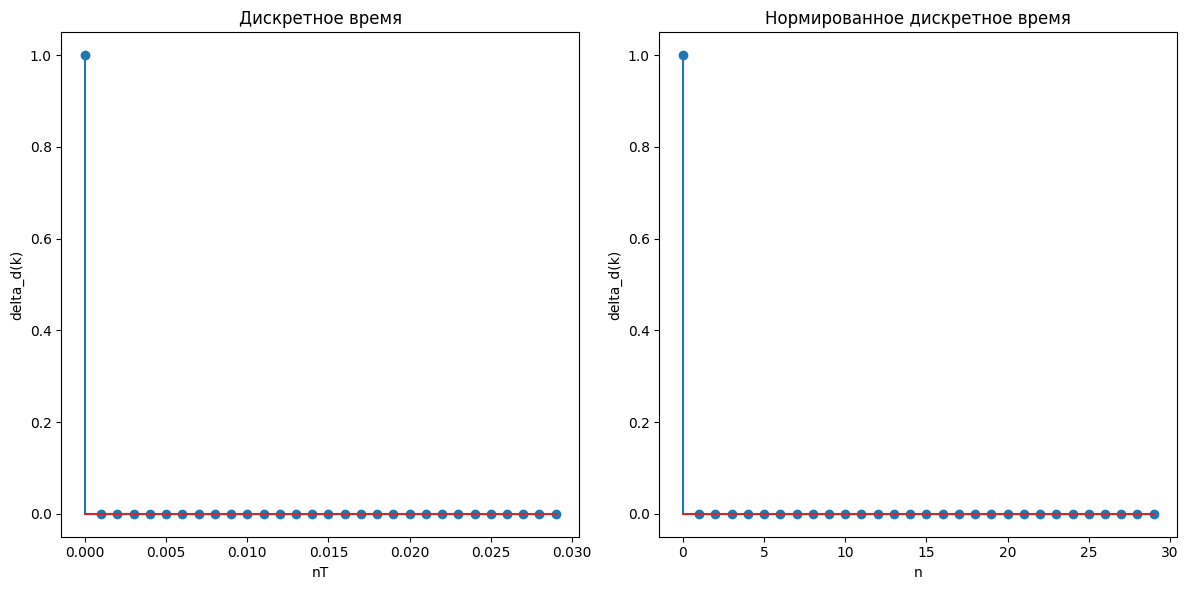

In [108]:
delta_d = lambda k: np.where(k==0, 1, 0)

k = np.arange(N)
t = k * T

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(t, delta_d(k), use_line_collection=True)
plt.title('Дискретное время')
plt.xlabel('nT')
plt.ylabel('delta_d(k)')

plt.subplot(1, 2, 2)
plt.stem(k, delta_d(k), use_line_collection=True)
plt.title('Нормированное дискретное время')
plt.xlabel('n')
plt.ylabel('delta_d(k)')

plt.tight_layout()
plt.show()

**Задание 2**

Был смоделирован дискретный единичный скачок $\sigma_d(k)$ на интервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

Дискретный единичный скачок является дискретным аналогом аналоговой функции единичного скачка (функции Хэвисайда). Единственным отличием между функциями (помимо дискретности) является тот факт, что в начальный момент времени величина аналогового скачка $\theta(0)$ в зависимости от определения может быть равна 0, 1 или 0.5. Если положить, что $\theta(0)=1$, то аналоговый единичный скачок будет в точности равен дискретному единичному скачку при бесконечно малом периоде дискретизации.

Частота дискретизации дискретного единичного скачка обратна периоду дискретизации: $f_d=\frac{1}{T}$.

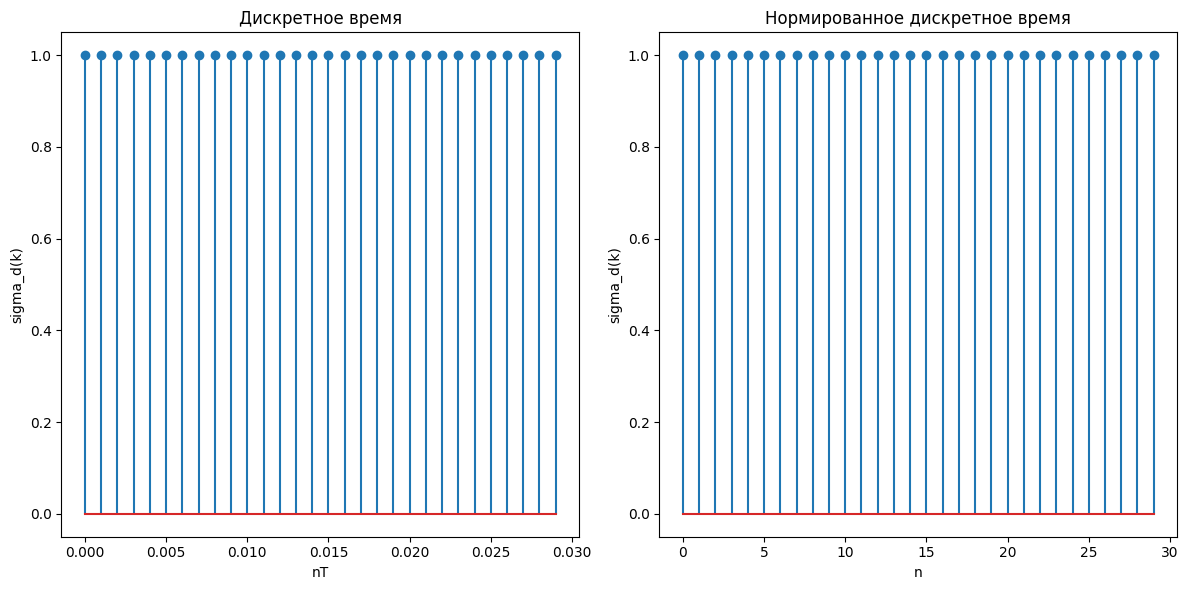

In [109]:
sigma_d = lambda k: np.where(k>=0, 1, 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(t, sigma_d(k), use_line_collection=True)
plt.title('Дискретное время')
plt.xlabel('nT')
plt.ylabel('sigma_d(k)')

plt.subplot(1, 2, 2)
plt.stem(k, sigma_d(k), use_line_collection=True)
plt.title('Нормированное дискретное время')
plt.xlabel('n')
plt.ylabel('sigma_d(k)')

plt.tight_layout()
plt.show()

**Задание 3**

Была смоделирована дискретная экспоненциальная функция $s_1(k)$ на интервалах дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$. 

Дискретная экспоненциальная функция является дискретным аналогом экспоненциальной функции. Отличием является то, что при значениях $k < 0$ аналоговая функция имеет значения $a^k$, а дискретная функция будет иметь нулевые значения.

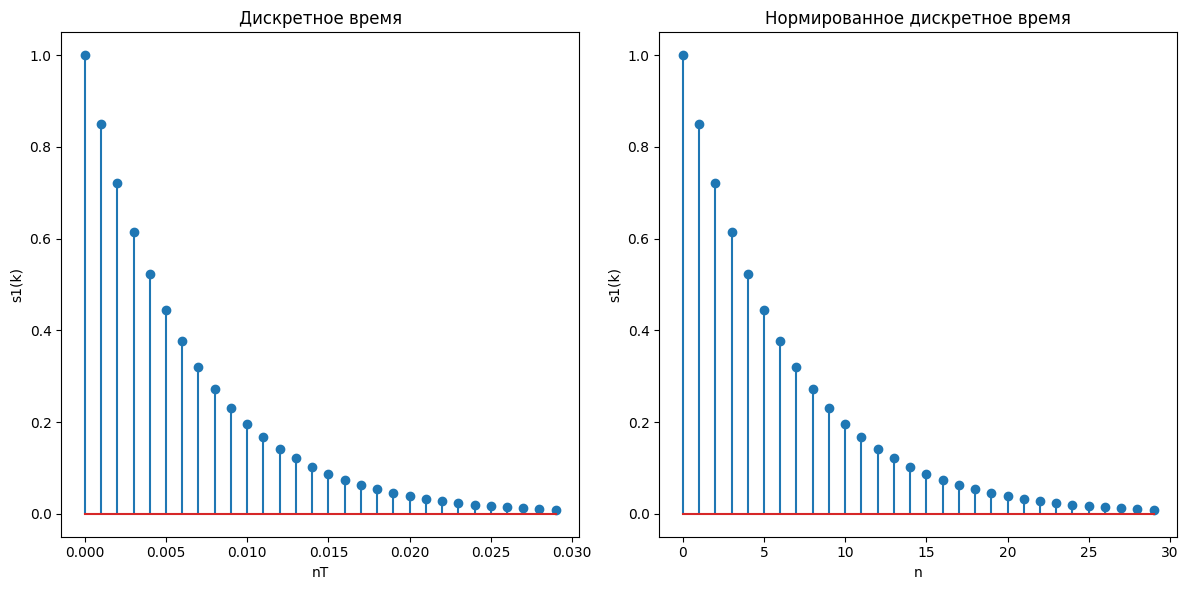

In [110]:
s1 = lambda k: a**k*(k >= 0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(t, s1(k), use_line_collection=True)
plt.title('Дискретное время')
plt.xlabel('nT')
plt.ylabel('s1(k)')

plt.subplot(1, 2, 2)
plt.stem(k, s1(k), use_line_collection=True)
plt.title('Нормированное дискретное время')
plt.xlabel('n')
plt.ylabel('s1(k)')

plt.tight_layout()
plt.show()

**Задание 4**

Был смоделирован дискретный комплексный гармонический сигнал $s_2(k)$ на вещественной и мнимой плоскостях на интервале дискретного нормированного времени $n \in [0, N-1]$. 

Дискретный комплексный гармонический сигнал является дискретным аналогом функций синуса и косинуса. Вещественная часть описывается функцией косинуса $cos(\hatω_0k)$, а мнимая часть - функцией синуса $sin(\hatω_0k)$. Другими словами, $s_2(k)=C\exp(j\hatω_0k) = C(cos(\hatω_0k) + jsin(\hatω_0k))$.

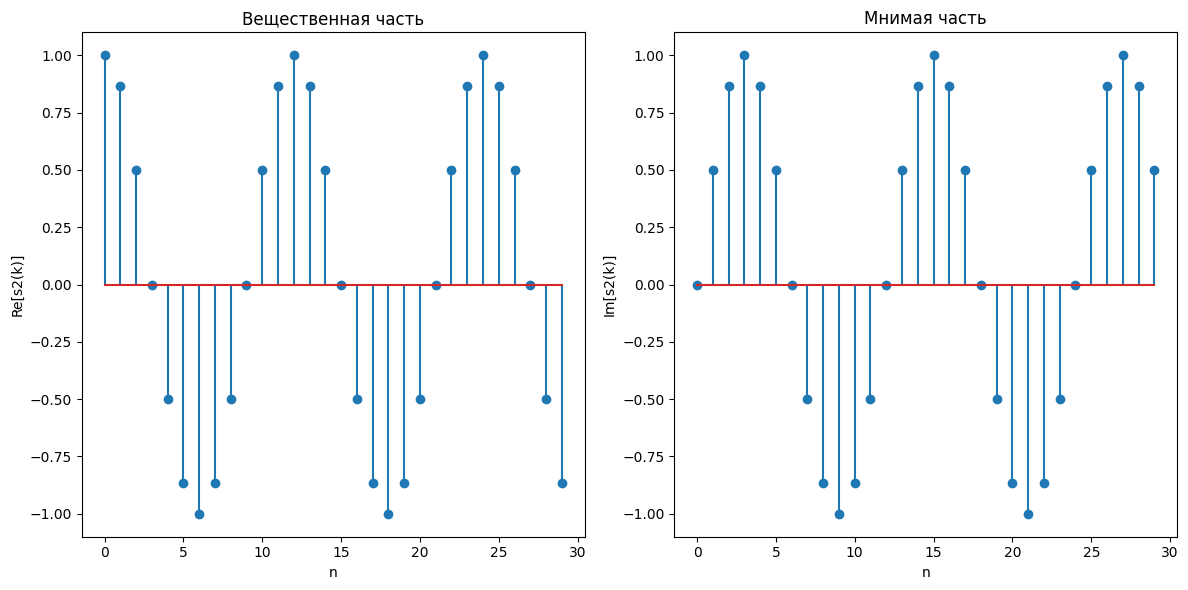

In [111]:
s2 = lambda k: C * np.exp(1j * w0 * k)

s2_values = s2(k)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stem(k, s2_values.real, use_line_collection=True)
plt.title('Вещественная часть')
plt.xlabel('n')
plt.ylabel('Re[s2(k)]')

plt.subplot(1, 2, 2)
plt.stem(k, s2_values.imag, use_line_collection=True)
plt.title('Мнимая часть')
plt.xlabel('n')
plt.ylabel('Im[s2(k)]')

plt.tight_layout()
plt.show()

**Задание 5**

Были смоделированы дискретные сигналы $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанные на $m$ отсчётов, на интервале дискретного нормированного времени $n \in [0, N-1]$. Можно заметить, что графики сдвинулись вправо, а формулы стали соответсвенно:

$$\delta_d(k-m) = \begin{cases}
 1, & k = m\\0,
 & k \neq m
 \end{cases}
 $$

$$\sigma_d(k-m) = \begin{cases}
 1, & k \ge m\\0,
 & k < m
 \end{cases}
$$

$$s_1(k-m) = \begin{cases}
a^{k-m}, & k \ge m\\0,
 & k < m
 \end{cases}
$$

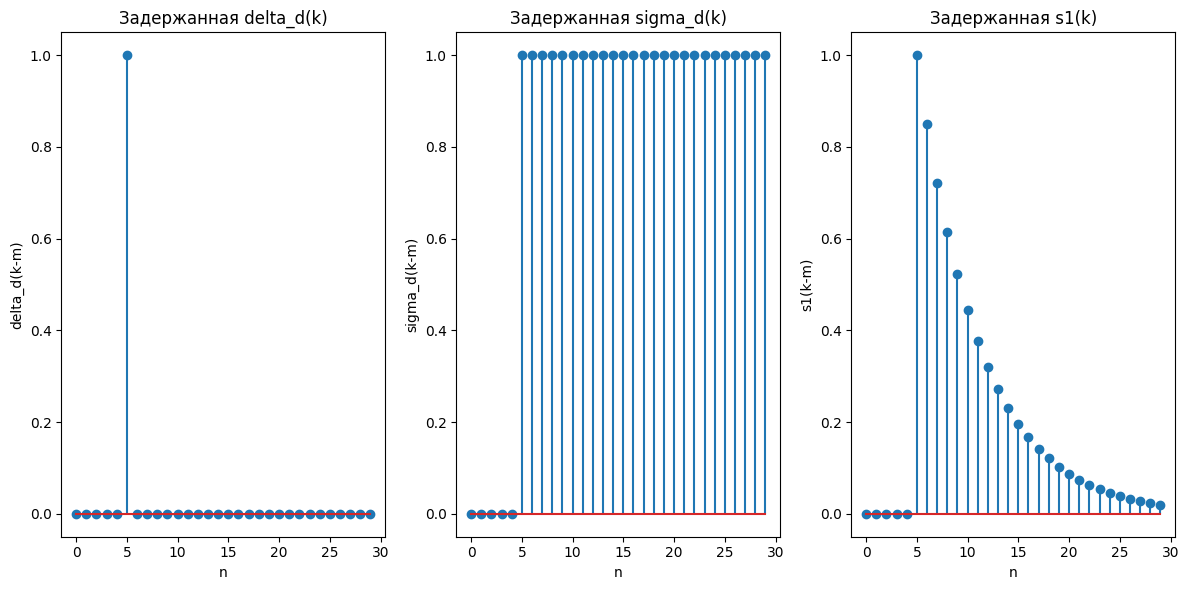

In [112]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.stem(k, delta_d(k-m), use_line_collection=True)
plt.title('Задержанная delta_d(k)')
plt.xlabel('n')
plt.ylabel('delta_d(k-m)')

plt.subplot(1, 3, 2)
plt.stem(k, sigma_d(k-m), use_line_collection=True)
plt.title('Задержанная sigma_d(k)')
plt.xlabel('n')
plt.ylabel('sigma_d(k-m)')

plt.subplot(1, 3, 3)
plt.stem(k, s1(k-m), use_line_collection=True)
plt.title('Задержанная s1(k)')
plt.xlabel('n')
plt.ylabel('s1(k-m)')

plt.tight_layout()
plt.show()

## Выводы

В результате выполнения практической работы было изучено математическое описание стандартных дискретных сигналов. С помощью програмных средств были смоделированы единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция и дискретный комплексный гармонический сигнал. Каждый из этих сигналов был сравнён с его аналоговой версией: соответсвенно функцией Дирака, функцией Хэвисайда, экспоненциальной функцией и функциями синуса и косинуса. Во время выполнения работы также были даны определения дискретизации, её частоты и периода; найдено соответсвие между дискретным временем и дискретным нормированным временем; смоделированы и проанализированы сигналы с задержкой. 